In [6]:
import sys
sys.path.insert(0, "../../../")

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.constants import c, h, m_p
from astropy.modeling.models import BlackBody

from agnpy.utils.conversion import mpc2
from agnpy.utils.math import axes_reshaper, ftiny, fmax, log10

from agnpy.targets.targets import CMB
from agnpy.emission_regions import Blob
from agnpy.spectra import PowerLaw, ExpCutoffPowerLaw
from agnpy.photo_meson.photo_meson import PhotoMesonProduction
from agnpy.photo_meson.kernels import PhiKernel, log_interp, secondaries, eta_0



Text(0, 0.5, 'B parameter')

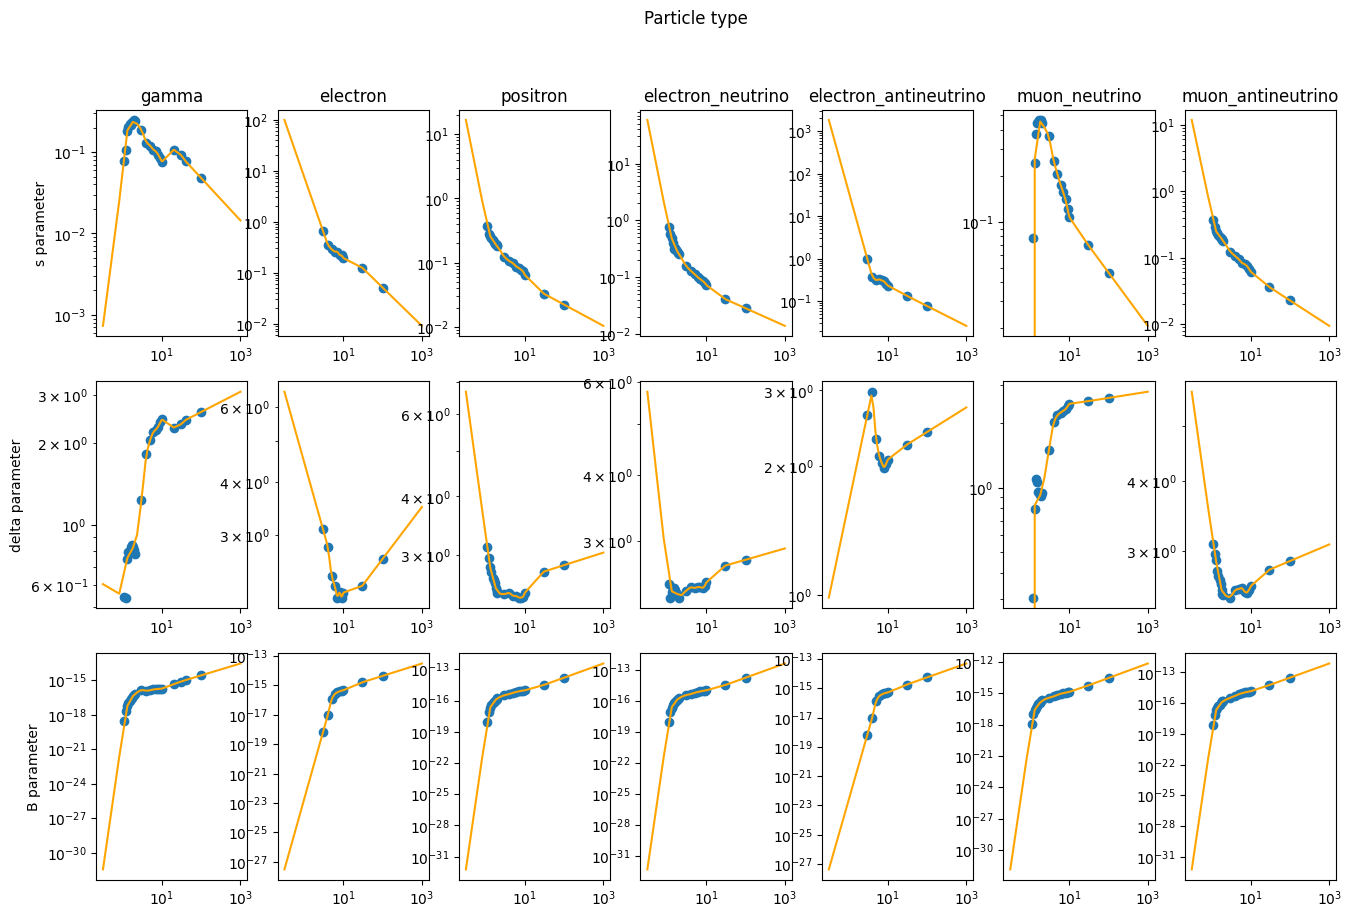

In [7]:
"""
Comparison between parameters from [KelnerAharonian2008] and their logspace interpolation 
"""

fig, ax = plt.subplots(3,7,figsize = (16, 10))

eta_val = np.linspace(eta_0,1000.0,2000)

fig.suptitle("Particle type")

i = 0
for particle in secondaries:
    interp_file = (
        f"../../data/photo_meson/kelner_aharonian_2008/phi_tables/{particle}.txt"
    )

    eta_eta0, s, delta, B = np.genfromtxt(
        interp_file, dtype="float", comments="#", usecols=(0, 1, 2, 3), unpack="True"
    )

    ax[0,i].set_title(particle)
    
    ax[0,i].scatter(eta_eta0,s)
    ax[1,i].scatter(eta_eta0,delta)
    ax[2,i].scatter(eta_eta0,B)

    # s_val_log = np.interp(eta_val, eta_eta0, s)
    # delta_val_log = np.interp(eta_val, eta_eta0, delta)
    # B_val_log = np.interp(eta_val, eta_eta0, B)

    s_val_log = log_interp(eta_val, eta_eta0, s)
    delta_val_log = log_interp(eta_val, eta_eta0, delta)
    B_val_log = log_interp(eta_val, eta_eta0, B)

    ax[0,i].loglog(eta_val,s_val_log,c="orange")
    ax[1,i].loglog(eta_val,delta_val_log,c="orange")
    ax[2,i].loglog(eta_val,B_val_log,c="orange")

    # ax[0,i].set_ylim(2e-2,2e0)
    # ax[1,i].set_ylim(2e-1,5e0)
    # ax[2,i].set_ylim(2e-19,4e-14)

    ax[0,i].set_xscale('log')
    ax[0,i].set_yscale('log')
    
    ax[1,i].set_xscale('log')
    ax[1,i].set_yscale('log')

    ax[2,i].set_xscale('log')
    ax[2,i].set_yscale('log')
    
    i=i+1

ax[0,0].set_ylabel("s parameter")
ax[1,0].set_ylabel("delta parameter")
ax[2,0].set_ylabel("B parameter")

/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:230: RuntimeWarning: invalid value encountered in power
  _exp = np.exp(-s * np.log(x / x_minus) ** delta)
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:231: RuntimeWarning: invalid value encountered in power
  _log = np.log(2 / (1 + y**2)) ** psi
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:230: RuntimeWarning: invalid value encountered in power
  _exp = np.exp(-s * np.log(x / x_minus) ** delta)
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:231: RuntimeWarning: invalid value encountered in power
  _log = np.log(2 / (1 + y**2)) ** psi
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:230: RuntimeWarning: invalid value encountered in power
  _exp = np.exp(-s * np.log(x / x_minus) ** delta)
/home/piotr/Do

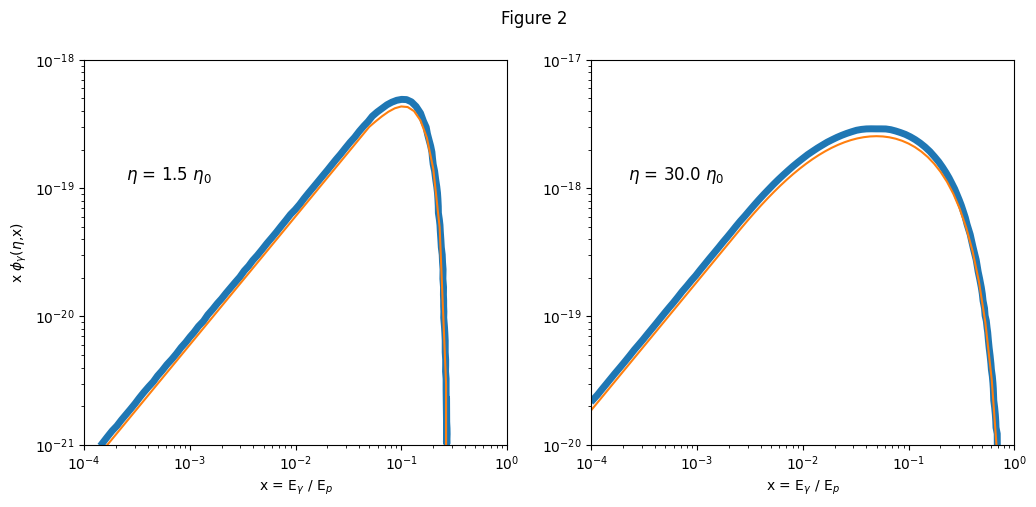

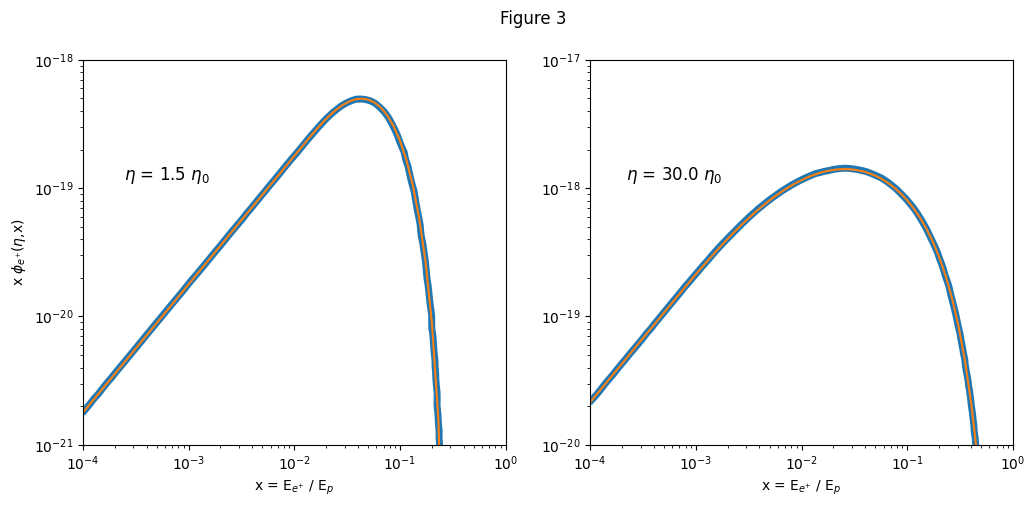

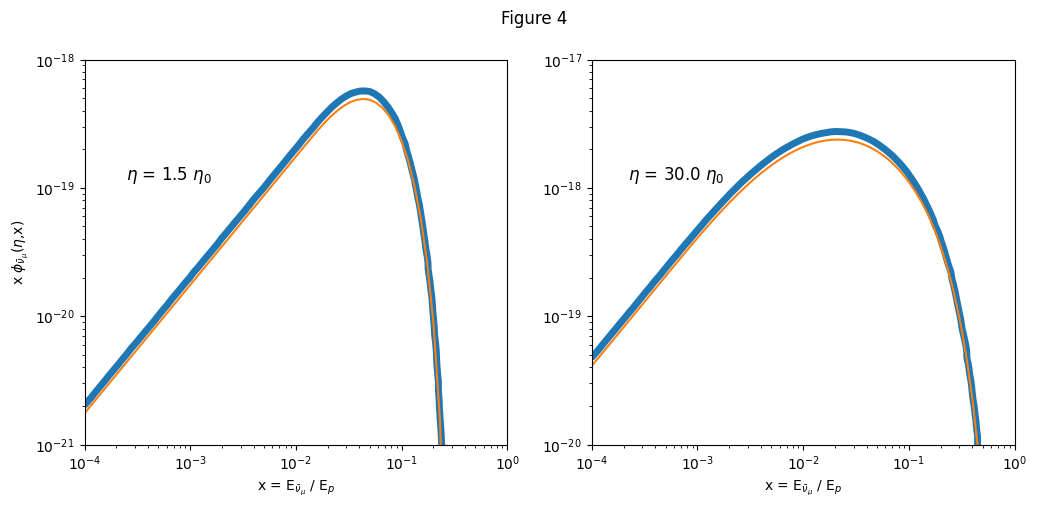

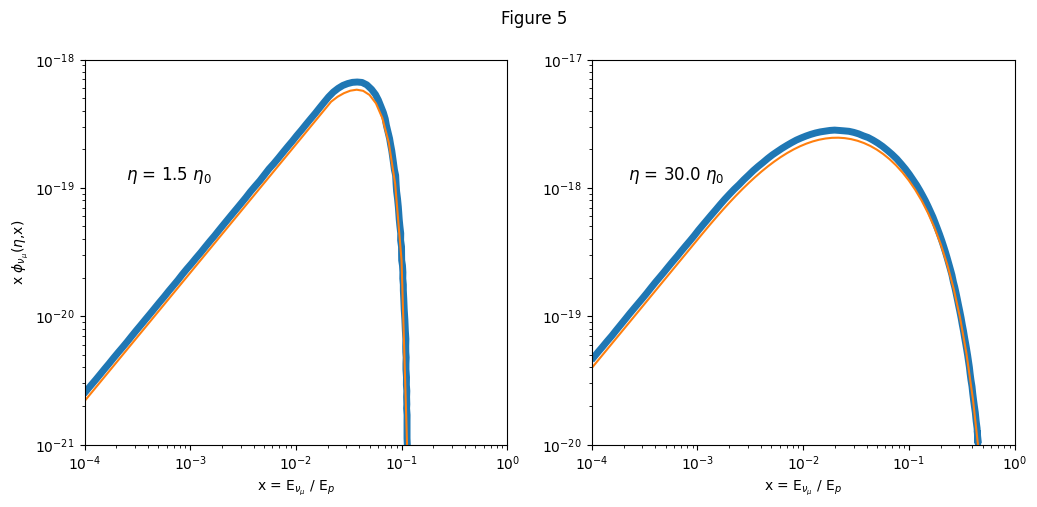

In [8]:
"""
[KelnerAharonian2008] figure 2, 3, 4, 5
"""

def xphi_plot(fig_number):

    if fig_number == "2":
        particle = "gamma"
        label = r"\gamma"
    if fig_number == "3":
        particle = "positron"
        label = r"e^{+}"
    if fig_number == "4":
        particle = "muon_antineutrino"
        label = r"\bar{\nu}_{\mu}"
    if fig_number == "5":
        particle = "muon_neutrino"
        label = r"\nu_{\mu}"

    x = np.logspace(-5,1,100)

    phi_kernel = PhiKernel(particle)

    fig, ax = plt.subplots(1,2,figsize = (12, 5))

    fig.suptitle(f"Figure {fig_number}")

    param_tab = ["1.5","30"]

    i = 0
    for parameter in param_tab:
        interp_file = (
            f"../../data/photo_meson/kelner_aharonian_2008/fig{fig_number}_values/{particle}_{parameter}eta0.txt"
        )

        x_i, spectrum = np.genfromtxt(
            interp_file, delimiter=";", dtype="float", comments="#", usecols=(0, 1), unpack="True",converters={0: lambda x: float(x.replace(',', '.')),
                                                                                                               1: lambda x: float(x.replace(',', '.'))}
        )

        x_i = np.power(10,x_i)
        spectrum = np.power(10,spectrum)

        ax[i].loglog(x_i,spectrum,lw=5)

        eta = float(parameter)*eta_0
        ax[i].loglog(x,x*phi_kernel(eta,x))

        i=i+1


    ax[0].set_xlim(1e-4,1e0)
    ax[0].set_ylim(1e-21,1e-18)

    ax[1].set_xlim(1e-4,1e0)
    ax[1].set_ylim(1e-20,1e-17)

    ax[0].set_xlabel(rf"x = E$_{{{label}}}$ / E$_p$")
    ax[1].set_xlabel(rf"x = E$_{{{label}}}$ / E$_p$")

    ax[0].set_ylabel(rf"x $\phi_{{{label}}}$($\eta$,x)")

    ax[0].text(0.2, 0.7, r"$\eta$ = 1.5 $\eta_{0}$", fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
    ax[1].text(0.2, 0.7, r"$\eta$ = 30.0 $\eta_{0}$", fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)

xphi_plot("2")
xphi_plot("3")
xphi_plot("4")
xphi_plot("5")

In [18]:
cmb = CMB(z = 0.0)
cmb_target = lambda nu: cmb.du_dnu(nu)

def dNdx(x, Ep, particle_type):

    epsilon0 = (eta_0 * mpc2**2 / (4 * Ep)).to_value("eV")
    eps_val = np.logspace(
        np.log10(epsilon0),
        np.log10(epsilon0) + 8,
        100
    )  * u.Unit("eV")  

    _eps, _x = axes_reshaper(eps_val, x)

    nu = (_eps / h).to("Hz")
    fph = cmb_target(nu)                    # (N_eps, 1)

    # --- kinematics
    eta = 4.0 * _eps * Ep / mpc2**2          # (N_eps, 1)

    # --- kernel
    phi_kernel = PhiKernel(particle_type)
    phi = phi_kernel(eta, _x)               # (N_eps, N_x)

    # --- integrand
    integrand = (fph * phi).to_value("1 / (erg s)")

    # --- integrate over epsilon axis
    result = np.trapezoid(
        integrand,
        x=_eps.to_value("erg"),
        axis=0
    ) * u.Unit("1 / s")                     # (N_x,)

    return result


# xdNdx = x_val * dNdx(x_val, Ep, "gamma")

/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid 

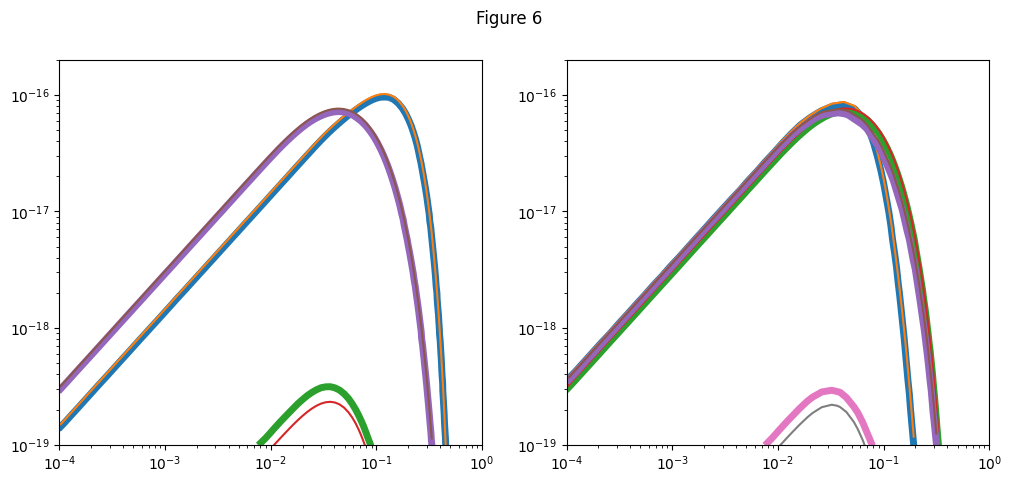

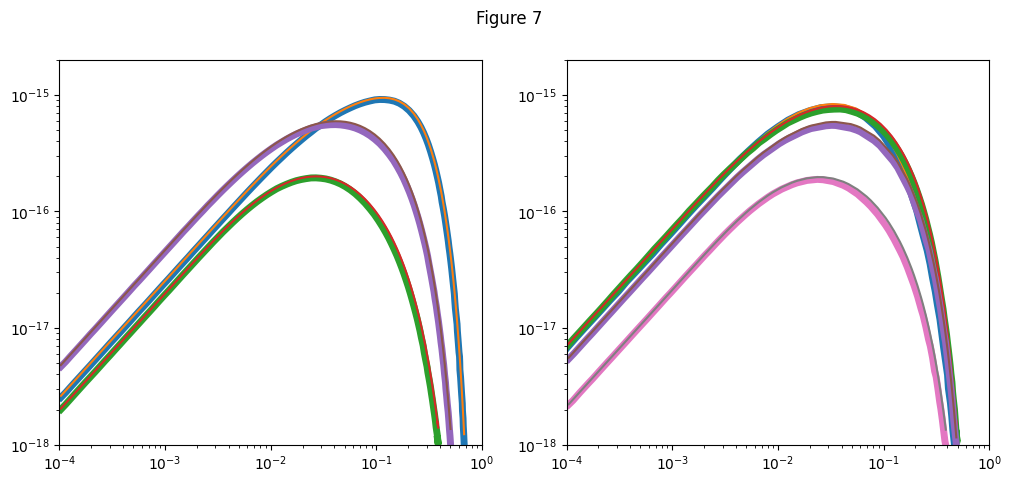

In [19]:
"""
[KelnerAharonian2008] figure 6
"""

def dNdx_plot(fig_number):

    particles_left = ["gamma", "electron", "positron"]
    particles_right = ["muon_neutrino", "muon_antineutrino", "electron_neutrino", "electron_antineutrino"]

    if fig_number == "6":
        Ep = 1e20 * u.Unit("eV")
    if fig_number == "7":
        Ep = 1e21 * u.Unit("eV")

    fig, ax = plt.subplots(1,2,figsize = (12, 5))

    fig.suptitle(f"Figure {fig_number}")

    i = 0
    for particle in particles_left:
        interp_file = (
            f"../../data/photo_meson/kelner_aharonian_2008/fig{fig_number}_values/{particle}.txt"
        )
        
        x_i, spectrum = np.genfromtxt(
            interp_file, delimiter=";", dtype="float", comments="#", usecols=(0, 1), unpack="True",converters={0: lambda x: float(x.replace(',', '.')),
                                                                                                               1: lambda x: float(x.replace(',', '.'))}
        )

        x_i = np.power(10,x_i)
        spectrum = np.power(10,spectrum)
        
        ax[i].loglog(x_i,spectrum,lw=5)


        # phi_kernel = PhiKernel(particle)
        # eta = float(parameter)*eta_0
        ax[i].loglog(x_i,x_i*dNdx(x_i,Ep,particle))

    i=i+1

    for particle in particles_right:
        interp_file = (
            f"../../data/photo_meson/kelner_aharonian_2008/fig{fig_number}_values/{particle}.txt"
        )
        
        x_i, spectrum = np.genfromtxt(
            interp_file, delimiter=";", dtype="float", comments="#", usecols=(0, 1), unpack="True",converters={0: lambda x: float(x.replace(',', '.')),
                                                                                                               1: lambda x: float(x.replace(',', '.'))}
        )

        x_i = np.power(10,x_i)
        spectrum = np.power(10,spectrum)
        
        ax[i].loglog(x_i,spectrum,lw=5)

        # phi_kernel = PhiKernel(particle)
        # eta = float(parameter)*eta_0
        ax[i].loglog(x_i,x_i*dNdx(x_i,Ep,particle))


    if fig_number == "6":
        ax[0].set_xlim(1e-4,1e0)
        ax[0].set_ylim(1e-19,2e-16)

        ax[1].set_xlim(1e-4,1e0)
        ax[1].set_ylim(1e-19,2e-16)
        
    if fig_number == "7":
        ax[0].set_xlim(1e-4,1e0)
        ax[0].set_ylim(1e-18,2e-15)
        
        ax[1].set_xlim(1e-4,1e0)
        ax[1].set_ylim(1e-18,2e-15)

    # ax[0].set_xlabel(rf"x = E$_{{{label}}}$ / E$_p$")
    # ax[1].set_xlabel(rf"x = E$_{{{label}}}$ / E$_p$")

    # ax[0].set_ylabel(rf"x $\phi_{{{label}}}$($\eta$,x)")

    # ax[0].text(0.2, 0.6, r"$\eta$ = 1.5 $\eta_{0}$", fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes)
    # ax[1].text(0.2, 0.6, r"$\eta$ = 30.0 $\eta_{0}$", fontsize=12, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes)


dNdx_plot("6")
dNdx_plot("7")

In [11]:
fig_number = "17" # 14 -> 1e-1**gamma_star, 15 -> 1e0**gamma_star, 16 -> 1e1*gamma_star, 17 -> 1e3*gamma_star

# Blob with proton population
E_star = 3e20 * u.Unit("eV")
gamma_star = (E_star / mpc2).to_value("")
# p_p, gamma_c, gamma_min, gamma_max = 2, 1e3*gamma_star, (1.0*u.Unit("GeV")/mpc2).to_value(""), 1e6*gamma_star

n_p = ExpCutoffPowerLaw.from_total_energy_density(
    1.0*u.Unit("erg/cm3"),
    mass = m_p,
    p = 2,
    gamma_c = 1e3*gamma_star, # change fig_number!
    gamma_min = (1.0*u.Unit("GeV")/mpc2).to_value(""),
    gamma_max = 1e6*gamma_star
    )

blob = Blob(n_p = n_p)
print ("Proton energy density = ", blob.u_p)

Proton energy density =  1.0000000000000002 erg / cm3


In [12]:
def plot_spectrum (E, spectrum, particle, power = 1, fig = None, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize = (8, 6))
    
    ax.loglog(
        E.to("eV"),
        (spectrum * E**power).to(f"erg{power-1} cm-3 s-1"),   # I think there's a mistake in K&A paper.
        label = particle
    )
    ax.set_xlabel("E [eV]")
    if power == 0:
        ylabel = "$\\frac{dN}{dE}$ [erg$^{-1}$ cm$^{-3}$ s$^{-1}$]"
    elif power == 1:
        ylabel = "E $\\frac{dN}{dE}$ [cm$^{-3}$ s$^{-1}$]"
    elif power == 2:
        ylabel = "E$^{2}$ $\\frac{dN}{dE}$ [erg cm$^{-3}$ s$^{-1}$]"
    ax.set_ylabel(ylabel)
    return fig, ax

In [13]:
def plot_spectrum_tab (E, spectrum, particle, power = 1, lw=1, fig = None, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize = (8, 6))
    
    ax.loglog(
        E.to("eV"),
        (spectrum).to(f"cm-3 s-1"),   # I think there's a mistake in K&A paper.
        label = particle+" KA",
        lw=lw
    )
    ax.set_xlabel("E [eV]")
    if power == 0:
        ylabel = "$\\frac{dN}{dE}$ [erg$^{-1}$ cm$^{-3}$ s$^{-1}$]"
    elif power == 1:
        ylabel = "E $\\frac{dN}{dE}$ [cm$^{-3}$ s$^{-1}$]"
    elif power == 2:
        ylabel = "E$^{2}$ $\\frac{dN}{dE}$ [erg cm$^{-3}$ s$^{-1}$]"
    ax.set_ylabel(ylabel)
    return fig, ax

/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:80: RuntimeWarning: invalid value encountered in sqrt
  x_2 = np.sqrt((eta - r**2 - 2 * r) * (eta - r**2 + 2 * r))
/home/piotr/Dokumenty/CODE/agnpy/agnpy/photo_meson/tests/../../../agnpy/photo_meson/kernels.py:92: RuntimeWarning: invalid value encountered in sqrt
  x_2 = np.sqrt((eta - r**2 - 2 * r) * (eta - r**2 + 2 * r))
/home/piotr/Dokumenty/CODE/agnpy/.venv/lib/python3.12/site-packages/astropy/units/quantity.py:648: RuntimeWarning: invalid value encountered in

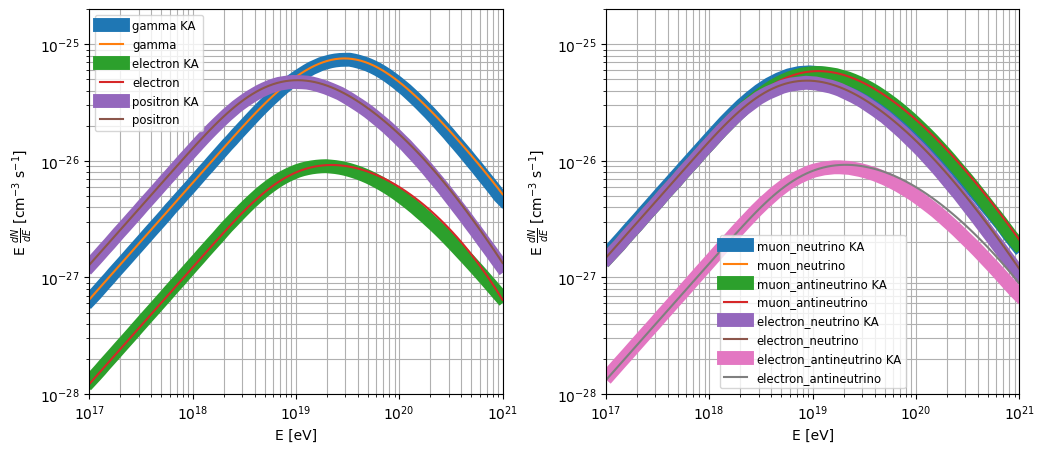

In [14]:
pmp_cmb = PhotoMesonProduction(blob, cmb_target)
E = np.logspace(17, 21, 100) * u.Unit("eV")
particles_left = ["gamma", "electron", "positron"]
particles_right = ["muon_neutrino", "muon_antineutrino", "electron_neutrino", "electron_antineutrino"]

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.25)
for particle in particles_left:
    E_i, spectrum= np.genfromtxt("../../data/photo_meson/kelner_aharonian_2008/fig{}_values/{}.txt".format(fig_number,particle), 
                          dtype="float", 
                          delimiter=";",
                          comments="#", 
                          usecols=(0, 1), 
                          unpack="True",
                          converters={0: lambda x: float(x.replace(',', '.')),
                                      1: lambda x: float(x.replace(',', '.'))})
    # print(E_i,spectrum)
    E_i = np.power(10,E_i)*u.Unit("eV")
    spectrum = np.power(10,spectrum)*u.Unit("cm-3 s-1")
    plot_spectrum_tab(E = E_i, spectrum = spectrum, power = 1, particle = particle, lw=10, fig = fig, ax = axs[0])
    
    spectrum = pmp_cmb.evaluate_spectrum(E, particle = particle)
    plot_spectrum(E = E, spectrum = spectrum, power = 1, particle = particle, fig = fig, ax = axs[0])
    
for particle in particles_right:
    E_i, spectrum= np.genfromtxt("../../data/photo_meson/kelner_aharonian_2008/fig{}_values/{}.txt".format(fig_number,particle), 
                          dtype="float", 
                          delimiter=";",
                          comments="#", 
                          usecols=(0, 1), 
                          unpack="True",
                          converters={0: lambda x: float(x.replace(',', '.')),
                                      1: lambda x: float(x.replace(',', '.'))})
    # print(E_i,spectrum)
    E_i = np.power(10,E_i)*u.Unit("eV")
    spectrum = np.power(10,spectrum)*u.Unit("cm-3 s-1")
    plot_spectrum_tab(E = E_i, spectrum = spectrum, power = 1, particle = particle, lw=10, fig = fig, ax = axs[1])
    
    spectrum = pmp_cmb.evaluate_spectrum(E, particle = particle)
    plot_spectrum(E = E, spectrum = spectrum, power = 1, particle = particle, fig = fig, ax = axs[1])

for ax in axs:
    if fig_number=="14":
        ax.set_xlim(1e17,1e20)
        ax.set_ylim(1e-30,2e-27)
    else:
        ax.set_xlim(1e17,1e21)
        ax.set_ylim(1e-28,2e-25)
    ax.grid(which = "both")
    ax.legend(fontsize = "small")